# Analysis of Arsenal's corners so far in the WSL in 2025/26

In [251]:
import pandas as pd
import mplsoccer
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

This data was collected by hand, watching games on YouTube. See later cells for a definition of the target location.

In [252]:
corners = pd.read_csv("data/corners.csv")
corners

,Video link,Game,Ground pass,Group,ID,Minute,Outcome,Side,Swing,Target location
0,https://www.youtube.com/live/ybQDwsrwIfg?si=VT...,Brighton (H),Yes,NaN,COR-1,104,Recycled,Right,NaN,Corner R
1,https://www.youtube.com/live/ybQDwsrwIfg?si=uw...,Brighton (H),Yes,Left front post,COR-2,91,Cleared,Left,Inswinger,A1
2,https://www.youtube.com/live/ybQDwsrwIfg?si=ad...,Brighton (H),No,Right front post,COR-3,79,Woodwork,Right,Inswinger,B5
3,https://www.youtube.com/live/ybQDwsrwIfg?si=4k...,Brighton (H),Yes,Left front post,COR-4,63,Cleared,Left,Inswinger,A1
4,https://www.youtube.com/live/ybQDwsrwIfg?si=Rs...,Brighton (H),Yes,NaN,COR-5,58,Saved,Right,NaN,Corner R
5,https://www.youtube.com/live/ybQDwsrwIfg?si=aM...,Brighton (H),No,Right front post,COR-6,57,Saved,Right,Inswinger,B4
6,https://www.youtube.com/live/ybQDwsrwIfg?si=kN...,Brighton (H),Yes,Left front post,COR-7,48,Cleared,Left,Inswinger,A1
7,https://www.youtube.com/live/ybQDwsrwIfg?si=d_...,Brighton (H),Yes,Left front post,COR-8,48,Turnover,Left,Inswinger,6L out
8,https://www.youtube.com/live/ybQDwsrwIfg?si=Wt...,Brighton (H),No,Left back post,COR-9,46,No connection,Left,Inswinger,C4
9,https://www.youtube.com/live/ybQDwsrwIfg?si=Sv...,Brighton (H),No,NaN,COR-10,10,Cleared,Left,Inswinger,A5


In [253]:
corners["Group"].value_counts()

Group
Left front post     9
Right back post     8
Right front post    6
Left back post      5
Name: count, dtype: int64

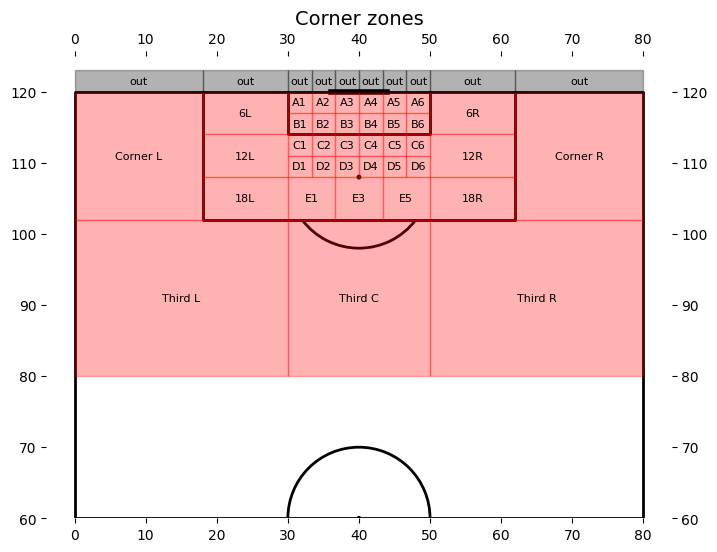

In [254]:
# Define and plot corner zones
fig, ax = plt.subplots(figsize=(10, 6))
pitch = mplsoccer.VerticalPitch(
    pitch_type="statsbomb",
    pitch_color="white",
    line_color="black",
    half=True,
    label=True,
    tick=True,
)
pitch.draw(ax=ax)

corner_zones = pd.DataFrame(
    [
        {"zone": "Corner L", "x0": 0, "x1": 18, "y0": 102, "y1": 120},
        {"zone": "Corner R", "x0": 62, "x1": 80, "y0": 102, "y1": 120},
        {"zone": "6L", "x0": 18, "x1": 30, "y0": 114, "y1": 120},
        {"zone": "12L", "x0": 18, "x1": 30, "y0": 108, "y1": 114},
        {"zone": "18L", "x0": 18, "x1": 30, "y0": 102, "y1": 108},
        {"zone": "6R", "x0": 50, "x1": 62, "y0": 114, "y1": 120},
        {"zone": "12R", "x0": 50, "x1": 62, "y0": 108, "y1": 114},
        {"zone": "18R", "x0": 50, "x1": 62, "y0": 102, "y1": 108},
        {"zone": "A1", "x0": 30, "x1": 33.33, "y0": 117, "y1": 120},
        {"zone": "A2", "x0": 33.33, "x1": 36.66, "y0": 117, "y1": 120},
        {"zone": "A3", "x0": 36.66, "x1": 40, "y0": 117, "y1": 120},
        {"zone": "A4", "x0": 40, "x1": 43.33, "y0": 117, "y1": 120},
        {"zone": "A5", "x0": 43.33, "x1": 46.66, "y0": 117, "y1": 120},
        {"zone": "A6", "x0": 46.66, "x1": 50, "y0": 117, "y1": 120},
        {"zone": "B1", "x0": 30, "x1": 33.33, "y0": 114, "y1": 117},
        {"zone": "B2", "x0": 33.33, "x1": 36.66, "y0": 114, "y1": 117},
        {"zone": "B3", "x0": 36.66, "x1": 40, "y0": 114, "y1": 117},
        {"zone": "B4", "x0": 40, "x1": 43.33, "y0": 114, "y1": 117},
        {"zone": "B5", "x0": 43.33, "x1": 46.66, "y0": 114, "y1": 117},
        {"zone": "B6", "x0": 46.66, "x1": 50, "y0": 114, "y1": 117},
        {"zone": "C1", "x0": 30, "x1": 33.33, "y0": 111, "y1": 114},
        {"zone": "C2", "x0": 33.33, "x1": 36.66, "y0": 111, "y1": 114},
        {"zone": "C3", "x0": 36.66, "x1": 40, "y0": 111, "y1": 114},
        {"zone": "C4", "x0": 40, "x1": 43.33, "y0": 111, "y1": 114},
        {"zone": "C5", "x0": 43.33, "x1": 46.66, "y0": 111, "y1": 114},
        {"zone": "C6", "x0": 46.66, "x1": 50, "y0": 111, "y1": 114},
        {"zone": "D1", "x0": 30, "x1": 33.33, "y0": 108, "y1": 111},
        {"zone": "D2", "x0": 33.33, "x1": 36.66, "y0": 108, "y1": 111},
        {"zone": "D3", "x0": 36.66, "x1": 40, "y0": 108, "y1": 111},
        {"zone": "D4", "x0": 40, "x1": 43.33, "y0": 108, "y1": 111},
        {"zone": "D5", "x0": 43.33, "x1": 46.66, "y0": 108, "y1": 111},
        {"zone": "D6", "x0": 46.66, "x1": 50, "y0": 108, "y1": 111},
        {"zone": "E1", "x0": 30, "x1": 36.66, "y0": 102, "y1": 108},
        {"zone": "E3", "x0": 36.66, "x1": 43.33, "y0": 102, "y1": 108},
        {"zone": "E5", "x0": 43.33, "x1": 50, "y0": 102, "y1": 108},
        {"zone": "Third L", "x0": 0, "x1": 30, "y0": 80, "y1": 102},
        {"zone": "Third C", "x0": 30, "x1": 50, "y0": 80, "y1": 102},
        {"zone": "Third R", "x0": 50, "x1": 80, "y0": 80, "y1": 102},
    ]
)

out_corner_zones = pd.DataFrame(
    [
        {"zone": "Corner L out", "x0": 0, "x1": 18, "y0": 120, "y1": 123},
        {"zone": "Corner R out", "x0": 62, "x1": 80, "y0": 120, "y1": 123},
        {"zone": "6L out", "x0": 18, "x1": 30, "y0": 120, "y1": 123},
        {"zone": "6R out", "x0": 50, "x1": 62, "y0": 120, "y1": 123},
        {"zone": "A1 out", "x0": 30, "x1": 33.33, "y0": 120, "y1": 123},
        {"zone": "A2 out", "x0": 33.33, "x1": 36.66, "y0": 120, "y1": 123},
        {"zone": "A3 out", "x0": 36.66, "x1": 40, "y0": 120, "y1": 123},
        {"zone": "A4 out", "x0": 40, "x1": 43.33, "y0": 120, "y1": 123},
        {"zone": "A5 out", "x0": 43.33, "x1": 46.66, "y0": 120, "y1": 123},
        {"zone": "A6 out", "x0": 46.66, "x1": 50, "y0": 120, "y1": 123},
    ]
)

all_zones = pd.concat([corner_zones, out_corner_zones], ignore_index=True)

for _, row in corner_zones.iterrows():
    ax.add_patch(
        plt.Rectangle(
            (row["x0"], row["y0"]),
            row["x1"] - row["x0"],
            row["y1"] - row["y0"],
            color="red",
            alpha=0.3,
        )
    )
    ax.text(
        (row["x0"] + row["x1"]) / 2,
        (row["y0"] + row["y1"]) / 2,
        row["zone"],
        color="black",
        ha="center",
        va="center",
        fontsize=8,
    )

for _, row in out_corner_zones.iterrows():
    ax.add_patch(
        plt.Rectangle(
            (row["x0"], row["y0"]),
            row["x1"] - row["x0"],
            row["y1"] - row["y0"],
            color="black",
            alpha=0.3,
        )
    )
    ax.text(
        (row["x0"] + row["x1"]) / 2,
        (row["y0"] + row["y1"]) / 2,
        "out",
        color="black",
        ha="center",
        va="center",
        fontsize=8,
    )

ax.set_ylim(60, 125)
ax.set_title("Corner zones", fontsize=14)
plt.show()

In [255]:
def plot_corner_heatmap(
    corners_by_target_location,
    col_name,
    metric_col_name,
    all_zones,
    title="",
    ax=None,
    label=True,
):
    """
    Plots the corner target locations on a soccer pitch.

    Parameters:
    - corners_by_target_location: DataFrame with columns 'Target location' and 'Count'.
    - all_zones: DataFrame with columns 'zone', 'x0', 'x1', 'y0', 'y1'.
    """
    # Create a mapping from zone names to counts
    zone_counts = dict(
        zip(
            corners_by_target_location[col_name],
            corners_by_target_location[metric_col_name],
        )
    )

    valid_zones = all_zones["zone"].values

    # Get counts for each valid zone (0 if not present)
    counts = [zone_counts.get(zone, 0) for zone in valid_zones]

    # Create figure
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 8))
    else:
        fig = ax.figure

    pitch = mplsoccer.VerticalPitch(
        pitch_type="statsbomb",
        pitch_color="white",
        line_color="black",
        half=True,
        line_zorder=2,
    )
    pitch.draw(ax=ax)

    # Create colormap and normalizer (using 'hot' or 'plasma' which work well on black)
    cmap = plt.cm.Reds
    norm = Normalize(vmin=0, vmax=max(counts) if counts else 1)

    # Plot each zone with color based on count
    for idx, row in all_zones.iterrows():
        zone_name = row["zone"]
        count = zone_counts.get(zone_name, 0)

        # Get color from colormap
        color = cmap(norm(count))

        ax.add_patch(
            plt.Rectangle(
                (row["x0"], row["y0"]),
                row["x1"] - row["x0"],
                row["y1"] - row["y0"],
                color=color,
                alpha=0.8,
                edgecolor="white",
                linewidth=0.5,
            )
        )

        if label:
            # Add zone label and count
            ax.text(
                (row["x0"] + row["x1"]) / 2,
                (row["y0"] + row["y1"]) / 2,
                f"{count}",
                color="black",
                ha="center",
                va="center",
                fontsize=10,
            )

    ax.set_ylim(80, 125)
    ax.set_title(title, color="black", pad=20)

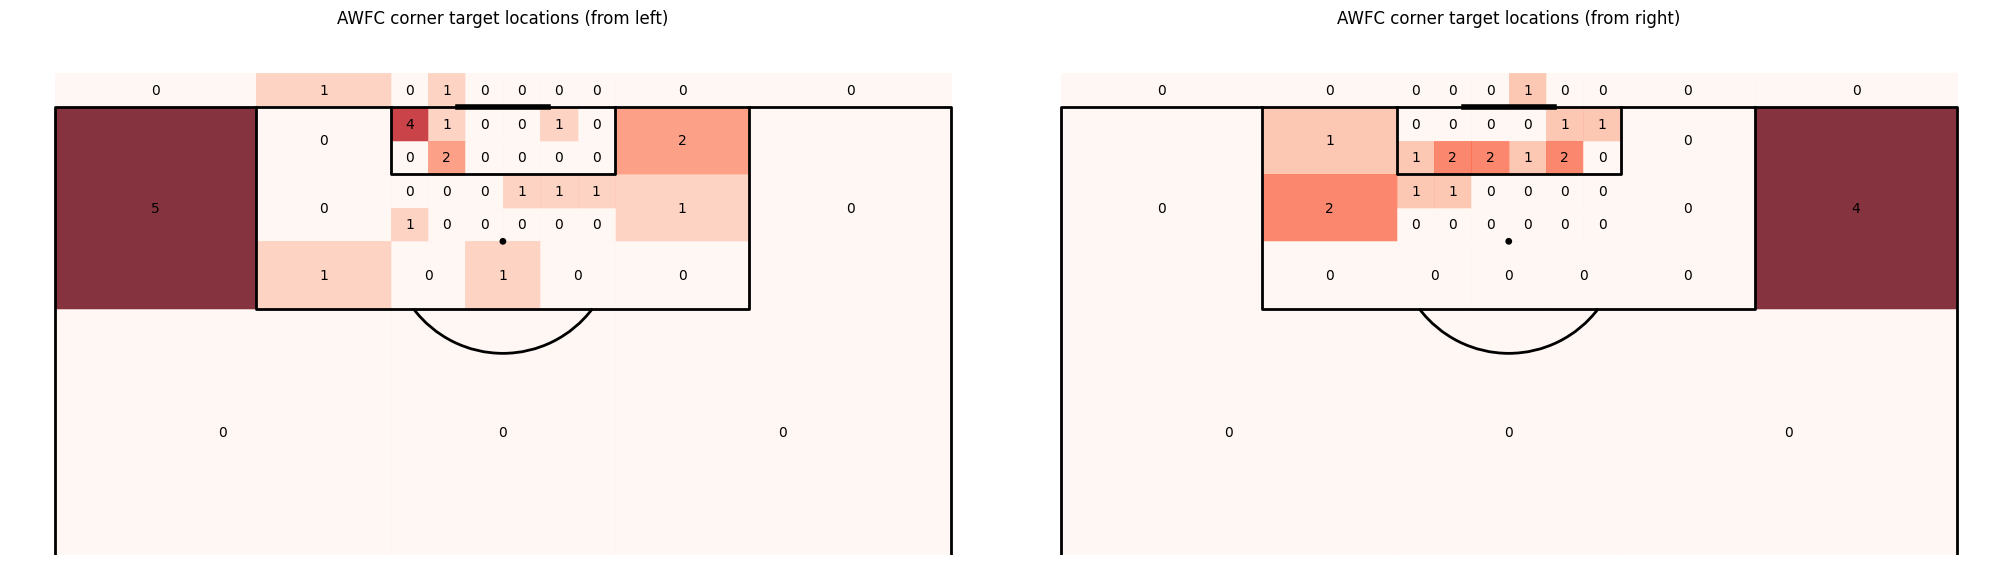

In [256]:
left_corners = corners[corners["Side"] == "Left"]
right_corners = corners[corners["Side"] == "Right"]

fig, ax = plt.subplots(ncols=2, figsize=(20, 8), constrained_layout=True)

plot_corner_heatmap(
    left_corners.groupby("Target location")["Target location"]
    .count()
    .reset_index(name="Count")
    .sort_values(by="Count", ascending=False),
    col_name="Target location",
    metric_col_name="Count",
    all_zones=all_zones,
    title="AWFC corner target locations (from left)",
    ax=ax[0],
)
plot_corner_heatmap(
    right_corners.groupby("Target location")["Target location"]
    .count()
    .reset_index(name="Count")
    .sort_values(by="Count", ascending=False),
    col_name="Target location",
    metric_col_name="Count",
    all_zones=all_zones,
    title="AWFC corner target locations (from right)",
    ax=ax[1],
)

# Player movement and roles

In [257]:
players = pd.read_csv("data/players.csv")
players

,Name,Corner ID,Corner group,Corners,End location,ID,Marking,Player name,Role,Start location
0,NaN,COR-11,Left front post,https://www.youtube.com/live/ybQDwsrwIfg?si=Tf...,A1,PLYR-1,Gained separation,Caitlin Foord,Pass target,B3
1,NaN,COR-11,Left front post,https://www.youtube.com/live/ybQDwsrwIfg?si=Tf...,A3,PLYR-2,Gained separation,Alessia Russo,Shot target,C4
2,NaN,COR-11,Left front post,https://www.youtube.com/live/ybQDwsrwIfg?si=Tf...,B3,PLYR-3,Gained separation,Katie Reid,Shot target,D3
3,NaN,COR-11,Left front post,https://www.youtube.com/live/ybQDwsrwIfg?si=Tf...,C2,PLYR-4,Gained separation,Steph Catley,Shot target,E3
4,NaN,COR-11,Left front post,https://www.youtube.com/live/ybQDwsrwIfg?si=Tf...,D6,PLYR-5,Goal marked,Frida Maanum,Decoy,E3
...,...,...,...,...,...,...,...,...,...,...
212,NaN,COR-43,Right back post,https://youtu.be/bnbw1Ozc_2M?si=QClTPpTvFrQ4Gp...,B5,PLYR-213,Goal marked,Steph Catley,Decoy,E3
213,NaN,COR-43,Right back post,https://youtu.be/bnbw1Ozc_2M?si=QClTPpTvFrQ4Gp...,D3,PLYR-214,Goal marked,Alessia Russo,Shot target,D2
214,NaN,COR-43,Right back post,https://youtu.be/bnbw1Ozc_2M?si=QClTPpTvFrQ4Gp...,E3,PLYR-215,Watched zonally,Kim Little,Mop up,Third C
215,NaN,COR-43,Right back post,https://youtu.be/bnbw1Ozc_2M?si=QClTPpTvFrQ4Gp...,C2,PLYR-216,Front marked,Katie Reid,Shot target,E1


In [258]:
def get_start_and_end_counts(players, corner_group):
    corner_group_players = players[players["Corner group"] == corner_group]
    start_counts = (
        corner_group_players.groupby("Start location")["Start location"]
        .count()
        .reset_index(name="Count")
        .sort_values(by="Count", ascending=False)
    )
    end_counts = (
        corner_group_players.groupby("End location")["End location"]
        .count()
        .reset_index(name="Count")
        .sort_values(by="Count", ascending=False)
    )
    return start_counts, end_counts

def plot_start_end_heatmaps(corner_group, all_zones):
    start_counts, end_counts = get_start_and_end_counts(players, corner_group)

    fig, ax = plt.subplots(ncols=2, figsize=(8, 4), constrained_layout=True)

    plot_corner_heatmap(
        start_counts,
        col_name="Start location",
        metric_col_name="Count",
        all_zones=all_zones,
        title=f"{corner_group} - Player start locations",
        ax=ax[0],
        label=False,
    )
    plot_corner_heatmap(
        end_counts,
        col_name="End location",
        metric_col_name="Count",
        all_zones=all_zones,
        title=f"{corner_group} - Player end locations",
        ax=ax[1],
        label=False,
    )
    
    return fig

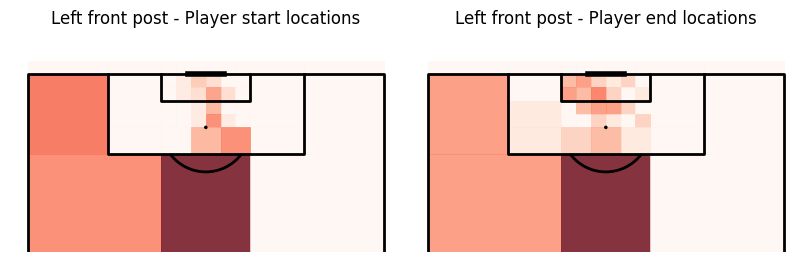

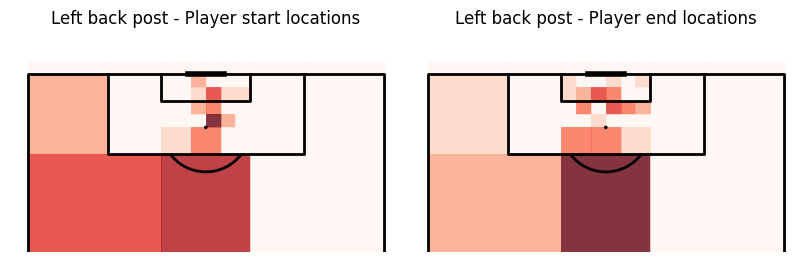

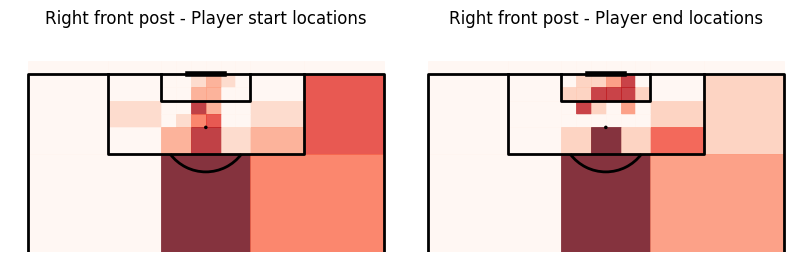

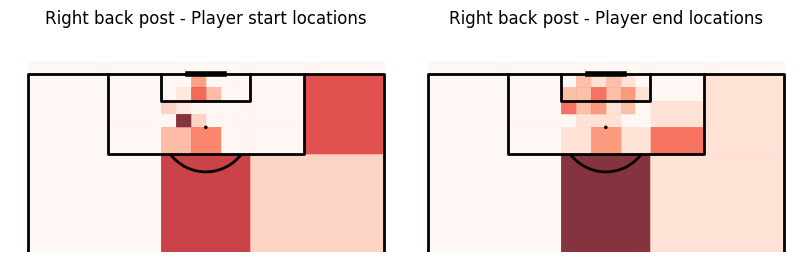

In [259]:
for group in players["Corner group"].unique():
    fig = plot_start_end_heatmaps(group, all_zones)
    plt.show()

In [260]:

# Plot start and end locations by role

def plot_start_end_by_role(corner_group_players, all_zones):
    roles = corner_group_players["Role"].unique()
    fig, ax = plt.subplots(
        nrows=2, ncols=len(roles), figsize=(4 * len(roles), 8), constrained_layout=True
    )

    for i, role in enumerate(roles):
        role_players = corner_group_players[corner_group_players["Role"] == role]

        role_start_counts = (
            role_players.groupby("Start location")["Start location"]
            .count()
            .reset_index(name="Count")
            .sort_values(by="Count", ascending=False)
        )
        role_end_counts = (
            role_players.groupby("End location")["End location"]
            .count()
            .reset_index(name="Count")
            .sort_values(by="Count", ascending=False)
        )

        plot_corner_heatmap(
            role_start_counts,
            col_name="Start location",
            metric_col_name="Count",
            all_zones=all_zones,
            title=f"{role} start locations",
            ax=ax[0, i],
            label=False,
        )

        plot_corner_heatmap(
            role_end_counts,
            col_name="End location",
            metric_col_name="Count",
            all_zones=all_zones,
            title=f"{role} end locations",
            ax=ax[1, i],
            label=False,
        )
        
    return fig

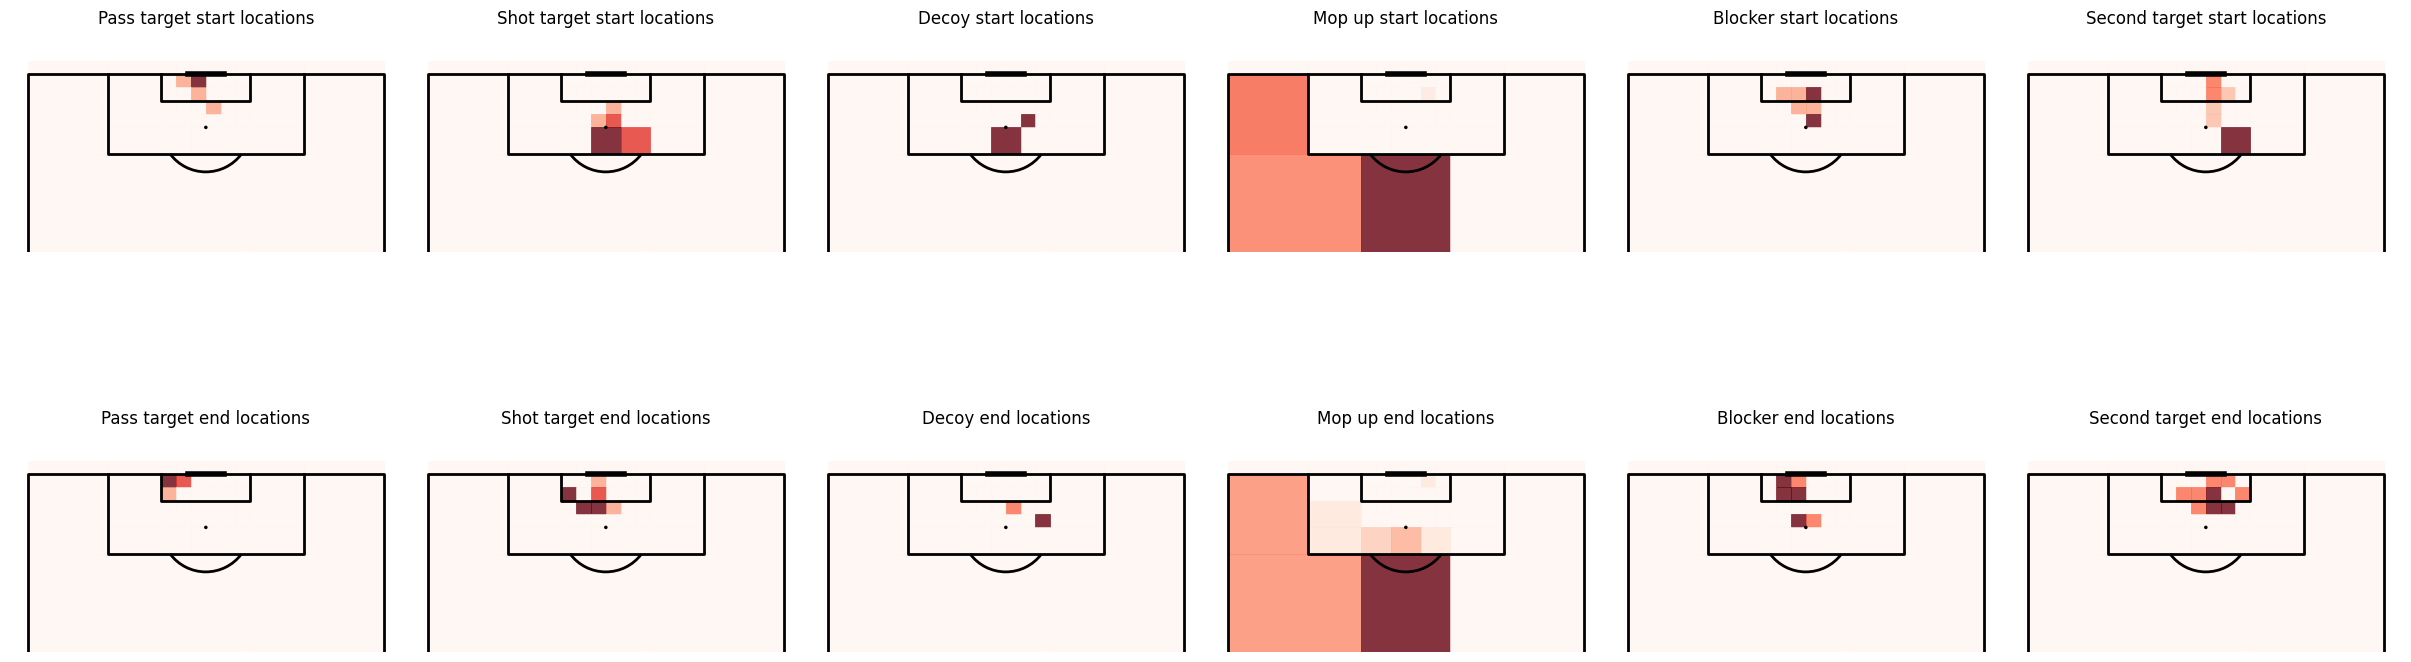

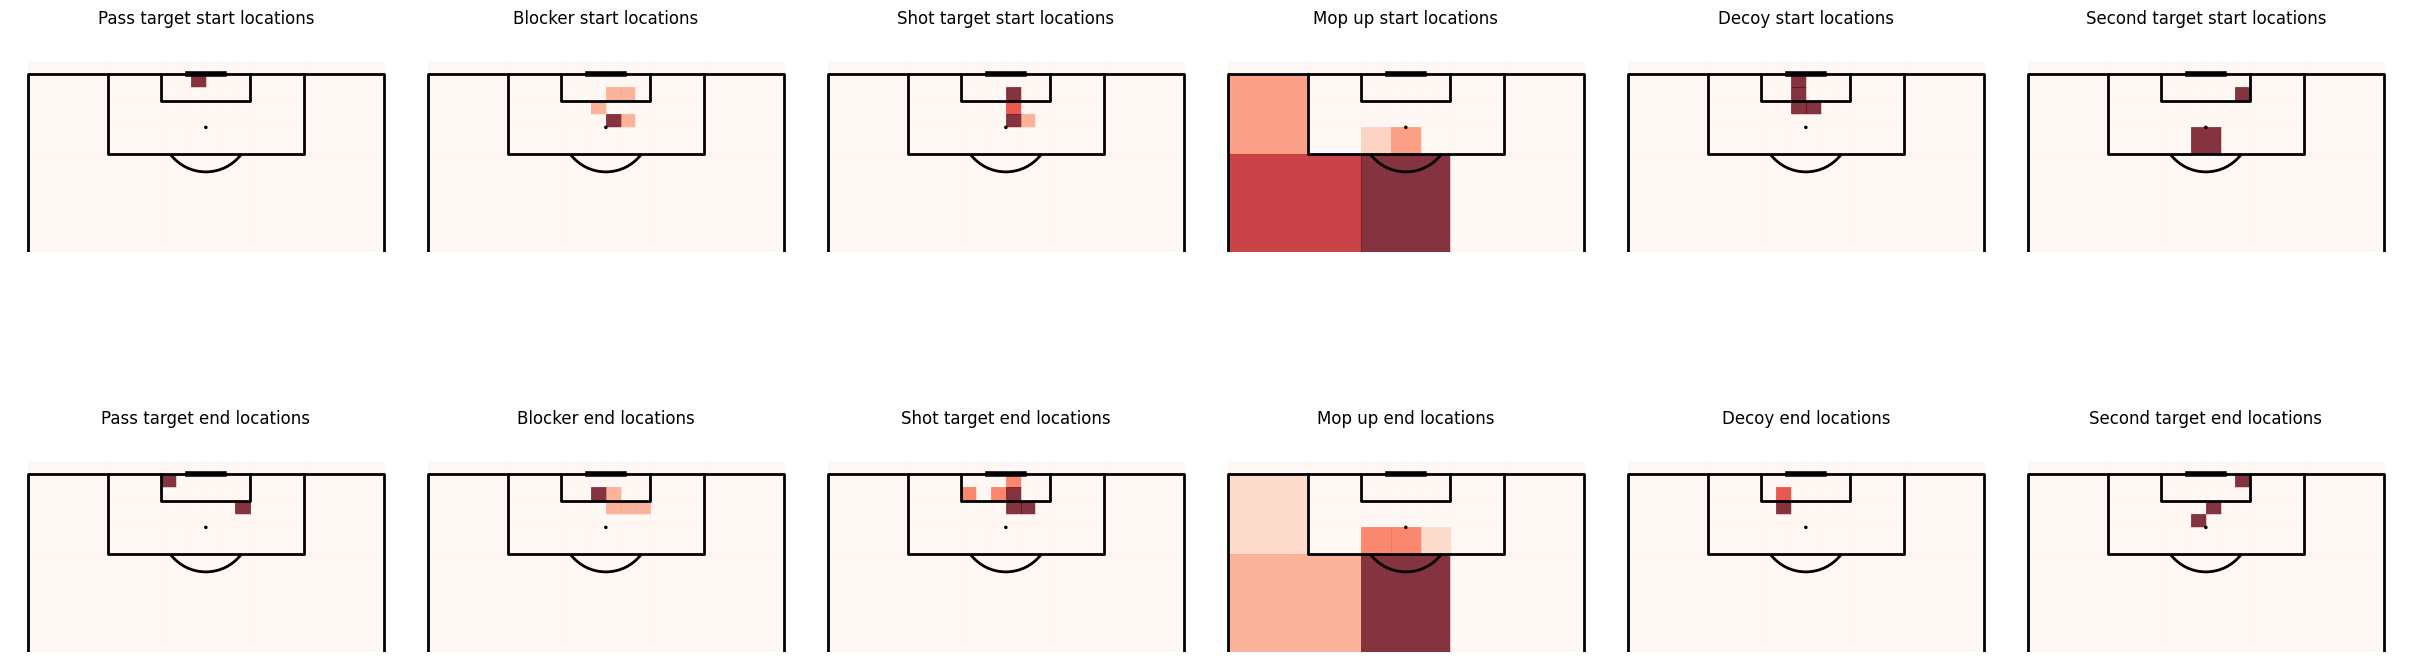

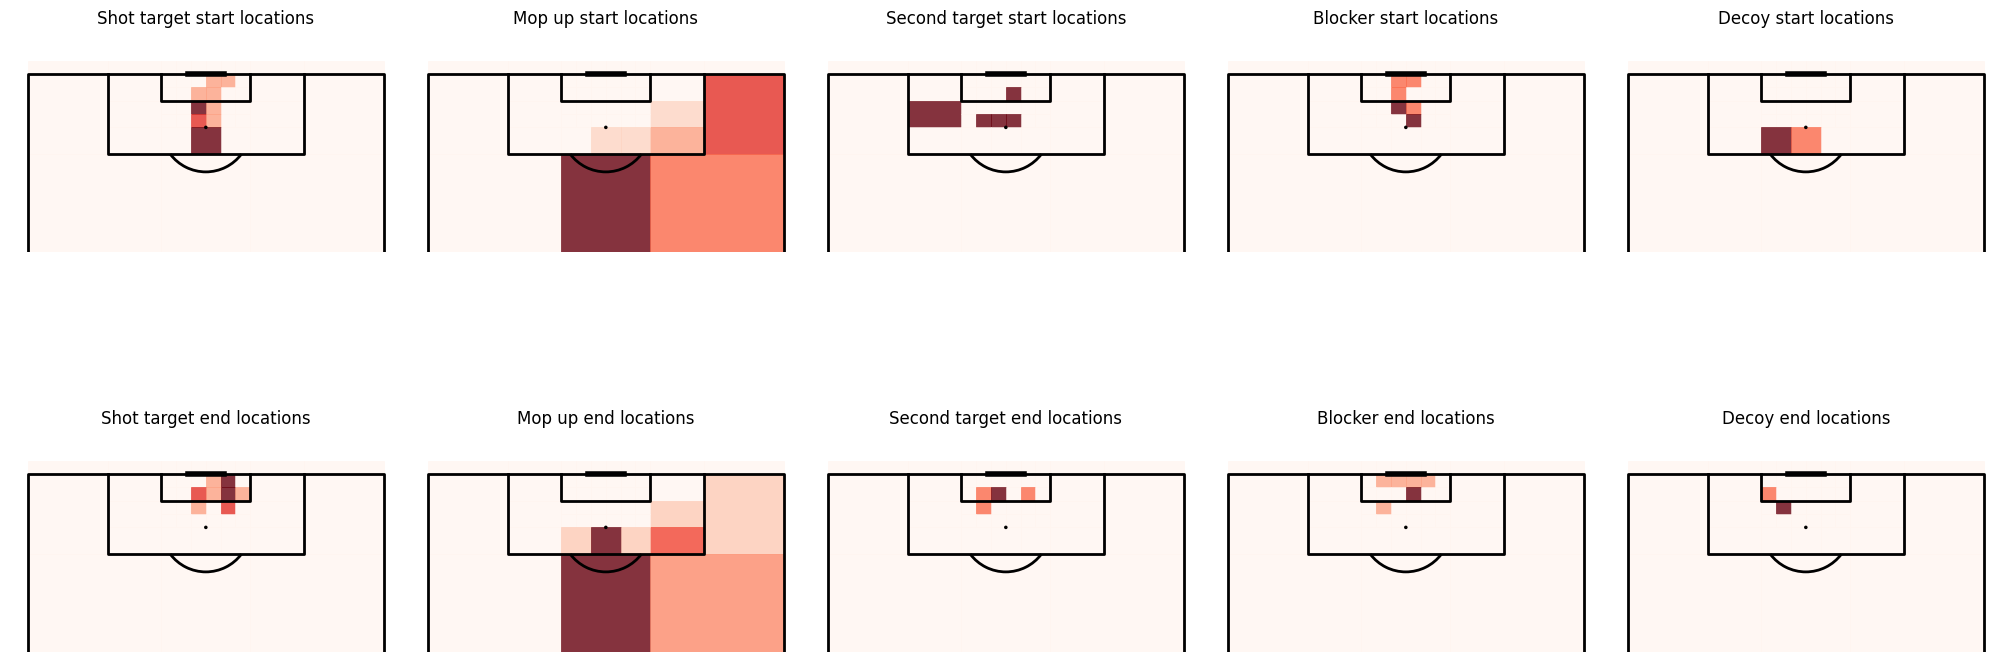

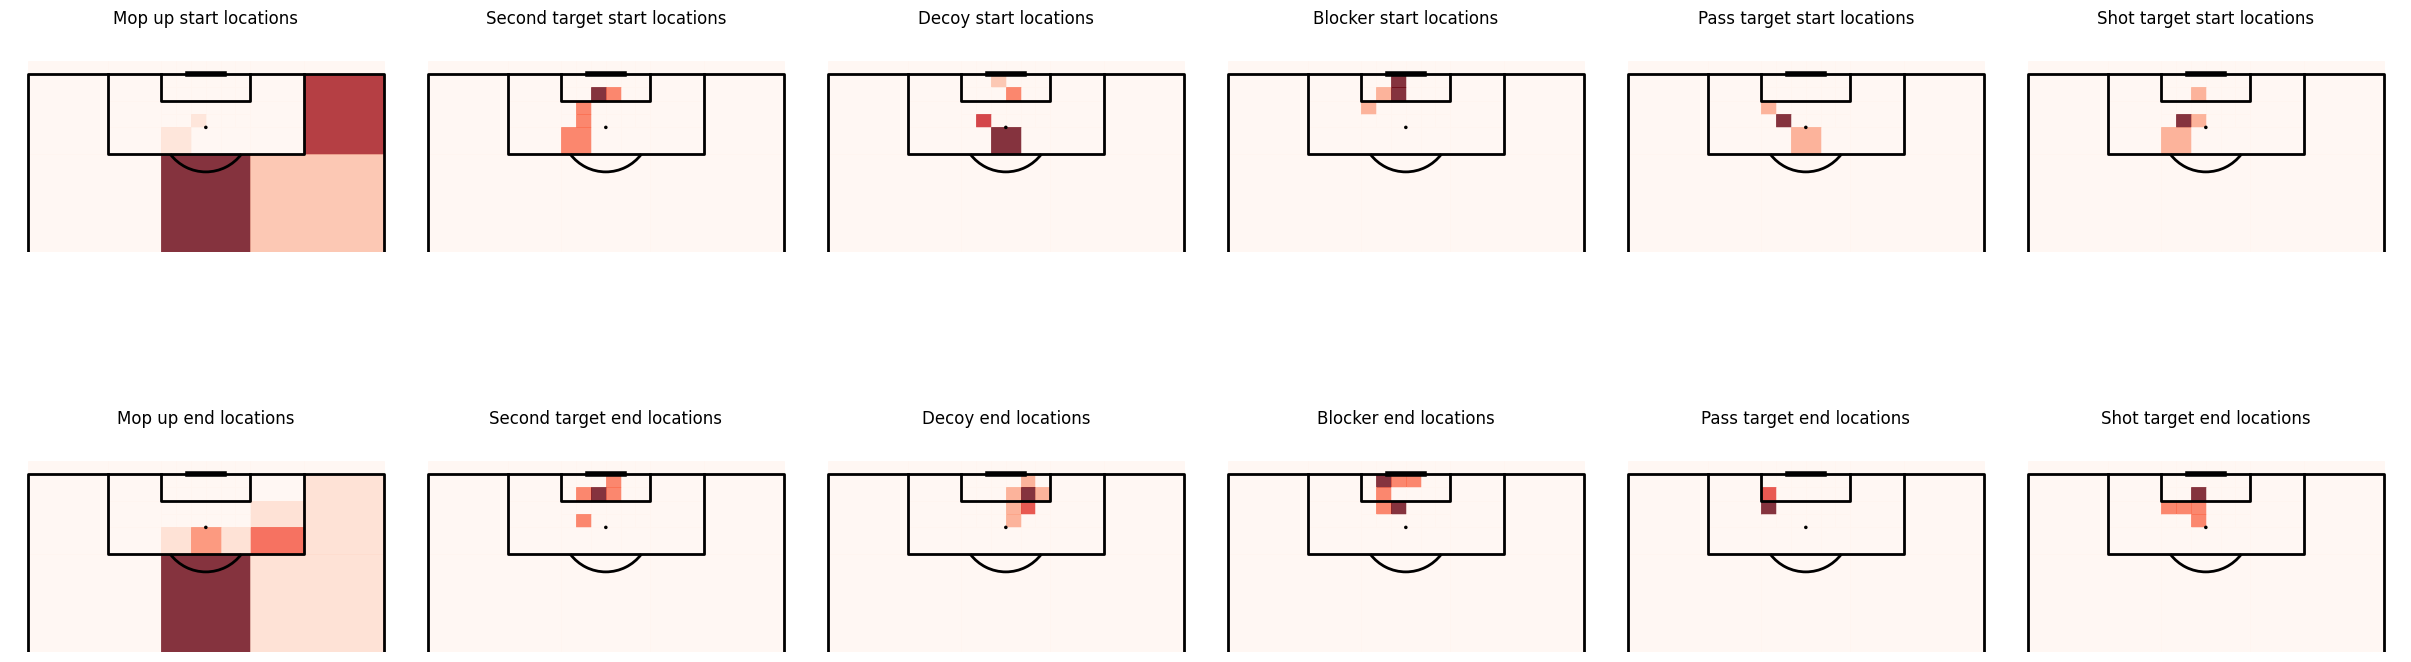

In [261]:
for group in players["Corner group"].unique():
    fig = plot_start_end_by_role(
        players[players["Corner group"] == group], all_zones
    )
    plt.show()

# Play quality

We define a custom "play quality" metric to assess the quality of the play being run at the corner. It is the sum across all players involved at the corner of contributing to a shot, assuming the delivery is perfect. 

In [262]:
# Metric definition: Role x Marking

roles = {
    "Shot target": 1,
    "Pass target": 0.5,
    "Second target": 0.5,
    "Blocker": 0.1,
    "Decoy": 0.1,
    "Mop up": 0.05,
}

marking = {
    "Free": 1,
    "Freed by blocker": 1,
    "Blocking": 1,
    "Gained separation": 0.8,
    "Goal marked": 0.3,
    "Watched zonally": 0.3,
    "Front marked": 0.1,
}

players["Role score"] = players["Role"].map(roles)
players["Marking score"] = players["Marking"].map(marking)
players["Play quality"] = players["Role score"] * players["Marking score"]

players

,Name,Corner ID,Corner group,Corners,End location,ID,Marking,Player name,Role,Start location,Role score,Marking score,Play quality
0,NaN,COR-11,Left front post,https://www.youtube.com/live/ybQDwsrwIfg?si=Tf...,A1,PLYR-1,Gained separation,Caitlin Foord,Pass target,B3,0.50,0.8,0.400
1,NaN,COR-11,Left front post,https://www.youtube.com/live/ybQDwsrwIfg?si=Tf...,A3,PLYR-2,Gained separation,Alessia Russo,Shot target,C4,1.00,0.8,0.800
2,NaN,COR-11,Left front post,https://www.youtube.com/live/ybQDwsrwIfg?si=Tf...,B3,PLYR-3,Gained separation,Katie Reid,Shot target,D3,1.00,0.8,0.800
3,NaN,COR-11,Left front post,https://www.youtube.com/live/ybQDwsrwIfg?si=Tf...,C2,PLYR-4,Gained separation,Steph Catley,Shot target,E3,1.00,0.8,0.800
4,NaN,COR-11,Left front post,https://www.youtube.com/live/ybQDwsrwIfg?si=Tf...,D6,PLYR-5,Goal marked,Frida Maanum,Decoy,E3,0.10,0.3,0.030
...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,NaN,COR-43,Right back post,https://youtu.be/bnbw1Ozc_2M?si=QClTPpTvFrQ4Gp...,B5,PLYR-213,Goal marked,Steph Catley,Decoy,E3,0.10,0.3,0.030
213,NaN,COR-43,Right back post,https://youtu.be/bnbw1Ozc_2M?si=QClTPpTvFrQ4Gp...,D3,PLYR-214,Goal marked,Alessia Russo,Shot target,D2,1.00,0.3,0.300
214,NaN,COR-43,Right back post,https://youtu.be/bnbw1Ozc_2M?si=QClTPpTvFrQ4Gp...,E3,PLYR-215,Watched zonally,Kim Little,Mop up,Third C,0.05,0.3,0.015
215,NaN,COR-43,Right back post,https://youtu.be/bnbw1Ozc_2M?si=QClTPpTvFrQ4Gp...,C2,PLYR-216,Front marked,Katie Reid,Shot target,E1,1.00,0.1,0.100


Now we have an objective measure of corner quality (excluding the delivery).

In [263]:
corner_play_quality = (
    players.groupby("Corner ID")["Play quality"]
    .sum()
    .reset_index(name="Play quality")
    .sort_values(by="Play quality", ascending=False)
)
corner_play_quality

,Corner ID,Play quality
0,COR-11,2.945
16,COR-36,2.630
1,COR-12,2.225
10,COR-25,2.195
2,COR-13,1.940
26,COR-9,1.895
22,COR-46,1.835
15,COR-35,1.815
17,COR-37,1.810
24,COR-7,1.680


I would be wary of making any conclusions based on this small sample but one could imagine using this as a opposition scouting tool to identify the most important players at corners, as this metric accounts for their role and their ability to get into a favourable position.

In [264]:
mean_player_play_quality = (
    players.groupby("Player name")["Play quality"]
    .mean()
    .reset_index(name="Mean play quality")
    .sort_values(by="Mean play quality", ascending=False)
)
mean_player_play_quality

,Player name,Mean play quality
14,Stina Blackstenius,0.432000
0,Alessia Russo,0.419200
16,Unsure,0.400000
13,Steph Catley,0.262609
3,Chloe Kelly,0.260000
10,Lotte Wubben Moy,0.250000
5,Frida Maanum,0.236071
7,Katie Reid,0.232500
2,Caitlin Foord,0.218438
1,Beth Mead,0.099583
